# ER Diagrams to Relational Models

ER diagrams may not naturally fit a relational model, therefore the translation will be approximate.

### Mapping a relationship

A relationship requires a join table, for example consider the following
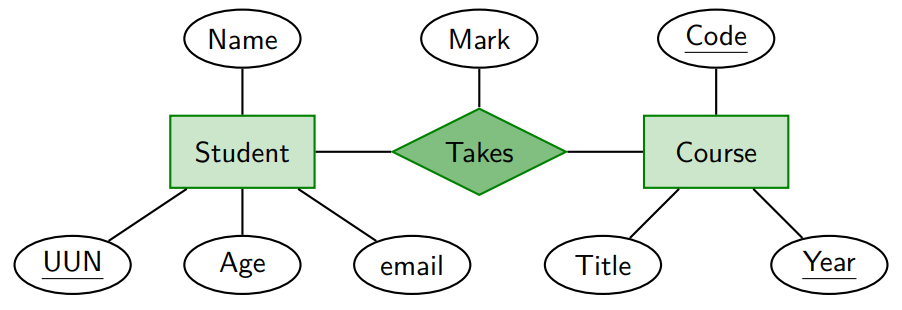

We can model the relationship as a seperate table

```sql
CREATE TABLE Takes (
    uun VARCHAR(8), 
    year INTEGER,
    code VARCHAR(20), 
    mark INTEGER,
    PRIMARY KEY (uun, code, year),
    FOREIGN KEY (uun) REFERENCES Student,
    FOREIGN KEY (code, year) REFERENCES Course 
)
```

The primary key is formed from the combination of the entitys in the relationship. Any attributes on the relationship are also stored in this table.

### Mapping key constraints
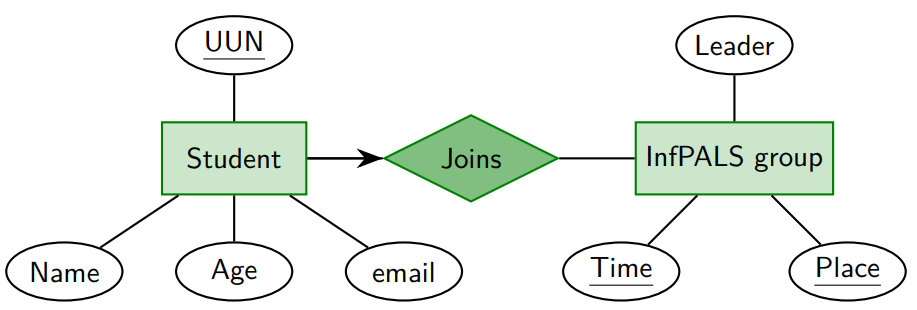

For key constraints the a simular approach is used, however we can make the primary key shorted since the key constraint (in this case `Student`) is enough to identify the relationship.

```sql
CREATE TABLE Joins (
    uun VARCHAR(8),
    time VARCHAR(20),
    place VARCHAR(32),
    PRIMARY KEY (uun),
    FOREIGN KEY (uun) REFERENCES Student,
    FOREIGN KEY (time,place) REFERENCES InfPALSGroup
)
```

Alternativly since a student can have only a single InfPALS group, we can represent the relationship inside the student table (with no need for a seperate relationship table)

```sql
CREATE TABLE Student (
    uun VARCHAR(8), 
    age INTEGER,
    name VARCHAR(20), 
    email VARCHAR(25),
    time VARCHAR(10), 
    place VARCHAR(32),
    PRIMARY KEY (uun),
    FOREIGN KEY (time,place) REFERENCES InfPALSGroup 
)
```

For students not in InfPALS then the foreign key will `NULL` since the relationship doesnt exsist. If we want to enforce patisipation then we can specify `NOT NULL` therefore the relationship must exsist.

```sql
CREATE TABLE Student (
    uun VARCHAR(8), 
    age INTEGER,
    name VARCHAR(20), 
    email VARCHAR(25),
    time VARCHAR(10) NOT NULL, 
    place VARCHAR(32) NOT NULL,
    PRIMARY KEY (uun),
    FOREIGN KEY (time,place) REFERENCES InfPALSGroup 
)
```

### Mapping Weak Entitys
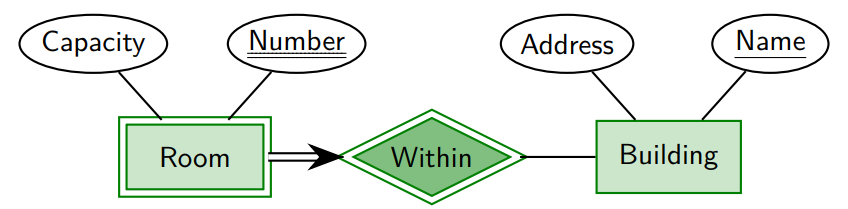
Weak entitys are implemented with foreign keys, the same as normal relationships. Weak entitys cannot exsist without their parent, thus we specify `ON DELETE CASCADE` to delete the weak entity if its parent is deleted.

```sql
CREATE TABLE Room (
    number VARCHAR(8),
    capacity INTEGER,
    building_name VARCHAR(20),
    PRIMARY KEY (number, building_name),
    FOREIGN KEY (building_name) REFERENCES Building(name) ON DELETE CASCADE 
)
```

### Mapping Entity Hierarchies

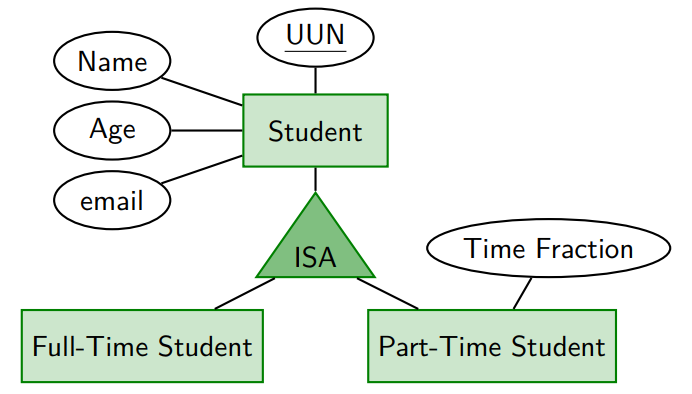

For subclasses we make additional tables with the same primary key as the superclass with a foreign key constrait to link them.

```sql
CREATE TABLE Student (
    uun VARCHAR(8), 
    age INTEGER,
    name VARCHAR(20), 
    email VARCHAR(25),
    PRIMARY KEY (uun) 
)
```

```sql
CREATE TABLE FullTimeStudent (
    uun VARCHAR(8),
    PRIMARY KEY (uun),
    FOREIGN KEY (uun) REFERENCES Student 
)
```

```sql
CREATE TABLE PartTimeStudent (
    uun VARCHAR(8), 
    fraction FLOAT,
    PRIMARY KEY (uun),
    FOREIGN KEY (uun) REFERENCES Student 
)
```

